In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
import tensorflow as tf
from keras import layers
from sklearn.model_selection import train_test_split

In [2]:
# Ścieżki do danych
data_dir = "D:/labSem6/Obrazy3"
clean_data_dir = os.path.join(data_dir, "ObrazyCzyste")
noisy_data_dir = os.path.join(data_dir, "ObrazySzum")

# Wczytanie obrazów czystych
clean_images = os.listdir(clean_data_dir)
x_train_clean = []
for image_file in clean_images:
    image_path = os.path.join(clean_data_dir, image_file)
    image = plt.imread(image_path)
    x_train_clean.append(image)
x_train_clean = np.array(x_train_clean)

# Wczytanie obrazów zaszumionych
noisy_images = os.listdir(noisy_data_dir)
x_train_noisy = []
for image_file in noisy_images:
    image_path = os.path.join(noisy_data_dir, image_file)
    image = plt.imread(image_path)
    x_train_noisy.append(image)
x_train_noisy = np.array(x_train_noisy)

In [3]:
# Normalizacja danych
x_train_clean = x_train_clean / 255.0
x_train_noisy = x_train_noisy / 255.0

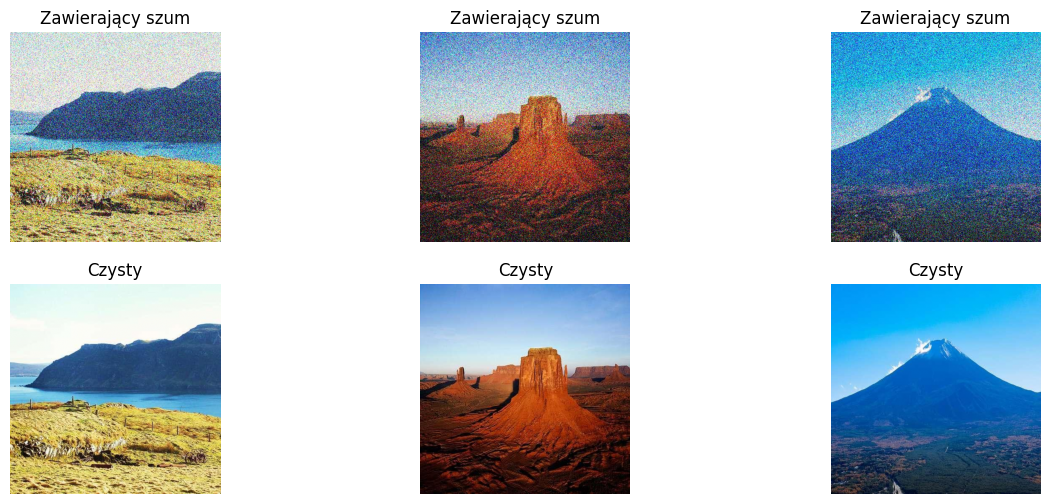

In [24]:
# Wybór 5 przykładów
selected_examples = x_train_noisy[:3]

# Wyświetlenie 5 obrazów (zawierających szum i czyste)
fig, axes = plt.subplots(2, 3, figsize=(15, 6))

# Wyświetlanie obrazów zawierających szum
for i, example in enumerate(selected_examples):
    axes[0, i].imshow(example)
    axes[0, i].axis('off')
    axes[0, i].set_title('Zawierający szum')

# Wyświetlanie czystych obrazów
for i, example in enumerate(selected_examples):
    clean_example = x_train_clean[i]
    axes[1, i].imshow(clean_example)
    axes[1, i].axis('off')
    axes[1, i].set_title('Czysty')

plt.show()

In [5]:
# Podział na zbiór treningowy i testowy
train_ratio = 0.8
x_train_clean, x_test_clean, x_train_noisy, x_test_noisy = train_test_split(x_train_clean, x_train_noisy,
                                                                            test_size=1 - train_ratio, random_state=42)

# Wyświetlenie informacji o liczbie obrazów treningowych i testowych
print("Liczba obrazów treningowych:", len(x_train_clean))
print("Liczba obrazów testowych:", len(x_test_clean))

Liczba obrazów treningowych: 646
Liczba obrazów testowych: 162


In [6]:
import numpy as np
import tensorflow as tf
from keras import layers

def create_denoising_autoencoder(input_shape):
    # Encoder
    inputs = tf.keras.Input(shape=input_shape)
    x = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(inputs)
    x = layers.MaxPooling2D((2, 2), padding='same')(x)
    x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(x)
    x = layers.MaxPooling2D((2, 2), padding='same')(x)
    x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
    encoded = layers.MaxPooling2D((2, 2), padding='same')(x)

    # Decoder
    x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(x)
    x = layers.UpSampling2D((2, 2))(x)
    x = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(x)
    x = layers.UpSampling2D((2, 2))(x)
    decoded = layers.Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)

    # Autoencoder model
    autoencoder = tf.keras.Model(inputs, decoded)
    autoencoder.compile(optimizer='adam', loss='mse')

    return autoencoder

# Create denoising autoencoder
input_shape = (500, 500, 3)
denoising_autoencoder = create_denoising_autoencoder(input_shape)
denoising_autoencoder.summary()


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 500, 500, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 500, 500, 128)     3584      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 250, 250, 128)    0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 250, 250, 64)      73792     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 125, 125, 64)     0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 125, 125, 32)      18464 

In [17]:
def create_denoising_autoencoder(input_shape):
    # Encoder
    inputs = tf.keras.Input(shape=input_shape)
    x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(inputs)
    x = layers.MaxPooling2D((2, 2), padding='same')(x)
    x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
    encoded = layers.MaxPooling2D((2, 2), padding='same')(x)

    # Decoder
    x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(encoded)
    x = layers.UpSampling2D((2, 2))(x)
    x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(x)
    x = layers.UpSampling2D((2, 2))(x)
    decoded = layers.Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)

    # Autoencoder model
    autoencoder = tf.keras.Model(inputs, decoded)
    autoencoder.compile(optimizer='adam', loss='mse')

    return autoencoder

# Create denoising autoencoder
input_shape = (500, 500, 3)
denoising_autoencoder = create_denoising_autoencoder(input_shape)
denoising_autoencoder.summary()

Model: "model_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_9 (InputLayer)        [(None, 500, 500, 3)]     0         
                                                                 
 conv2d_54 (Conv2D)          (None, 500, 500, 64)      1792      
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 250, 250, 64)     0         
 g2D)                                                            
                                                                 
 conv2d_55 (Conv2D)          (None, 250, 250, 32)      18464     
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 125, 125, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_56 (Conv2D)          (None, 125, 125, 32)      9248

In [7]:
gaussian_early_stop = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)

In [8]:
# Trenowanie modelu
history = denoising_autoencoder.fit(x_train_noisy, x_train_clean, epochs=50, batch_size=20, validation_split=0.2, callbacks=[gaussian_early_stop])

Epoch 1/50
26/26 [==============================] - 609s 22s/step - loss: 0.0338 - val_loss: 0.0141
Epoch 2/50
26/26 [==============================] - 575s 22s/step - loss: 0.0103 - val_loss: 0.0082
Epoch 3/50
26/26 [==============================] - 567s 22s/step - loss: 0.0080 - val_loss: 0.0073
Epoch 4/50
26/26 [==============================] - 567s 22s/step - loss: 0.0072 - val_loss: 0.0066
Epoch 5/50
26/26 [==============================] - 568s 22s/step - loss: 0.0065 - val_loss: 0.0061
Epoch 6/50
26/26 [==============================] - 568s 22s/step - loss: 0.0064 - val_loss: 0.0060
Epoch 7/50
26/26 [==============================] - 570s 22s/step - loss: 0.0061 - val_loss: 0.0056
Epoch 8/50
26/26 [==============================] - 569s 22s/step - loss: 0.0060 - val_loss: 0.0056
Epoch 9/50
26/26 [==============================] - 568s 22s/step - loss: 0.0056 - val_loss: 0.0056
Epoch 10/50
26/26 [==============================] - 588s 23s/step - loss: 0.0054 - val_loss: 0.0051

In [9]:
# Ocena modelu na danych testowych
loss = denoising_autoencoder.evaluate(x_test_noisy, x_test_clean)
print("Błąd rekonstrukcji na danych testowych:", loss)

6/6 [==============================] - 39s 6s/step - loss: 0.0042
Błąd rekonstrukcji na danych testowych: 0.00421982491388917


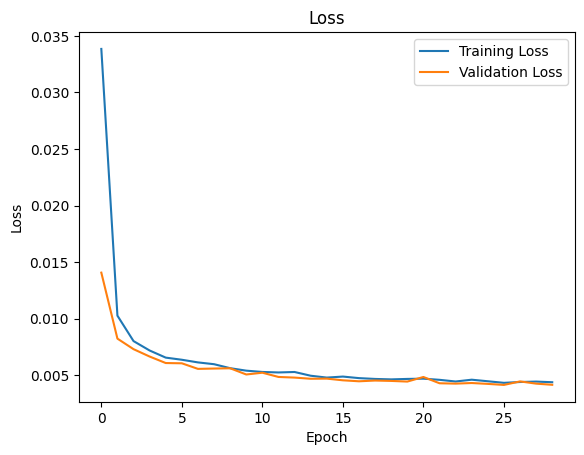

In [10]:
# Narysowanie wykresu straty
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [13]:
model_directory = 'my_models'
if not os.path.exists(model_directory):
    os.makedirs(model_directory)

In [14]:
# Сохранить модель после 10 эпох
#denoising_autoencoder.save(os.path.join(model_directory, 'my_model_10_epochs.h5'))
# Сохранить модель после 20 эпох
## denoising_autoencoder.save(os.path.join(model_directory, 'my_model_20_epochs.h5'))
# denoising_autoencoder.save(os.path.join(model_directory, 'my_model_50_epochs.h5'))
# denoising_autoencoder.save(os.path.join(model_directory, 'bad_model.h5'))
# denoising_autoencoder.save(os.path.join(model_directory, 'better_model.h5'))
denoising_autoencoder.save(os.path.join(model_directory, 'better_model29.h5'))

In [15]:
from keras.models import load_model

# Загрузить модель
loaded_model10 = load_model(os.path.join(model_directory, 'my_model_10_epochs.h5'))
loaded_model20 = load_model(os.path.join(model_directory, 'my_model_20_epochs.h5'))
loaded_model50 = load_model(os.path.join(model_directory, 'my_model_50_epochs.h5'))
loaded_modelbetter = load_model(os.path.join(model_directory, 'better_model.h5'))
loaded_modelbetter29 = load_model(os.path.join(model_directory, 'better_model29.h5'))

6/6 [==============================] - 38s 6s/step


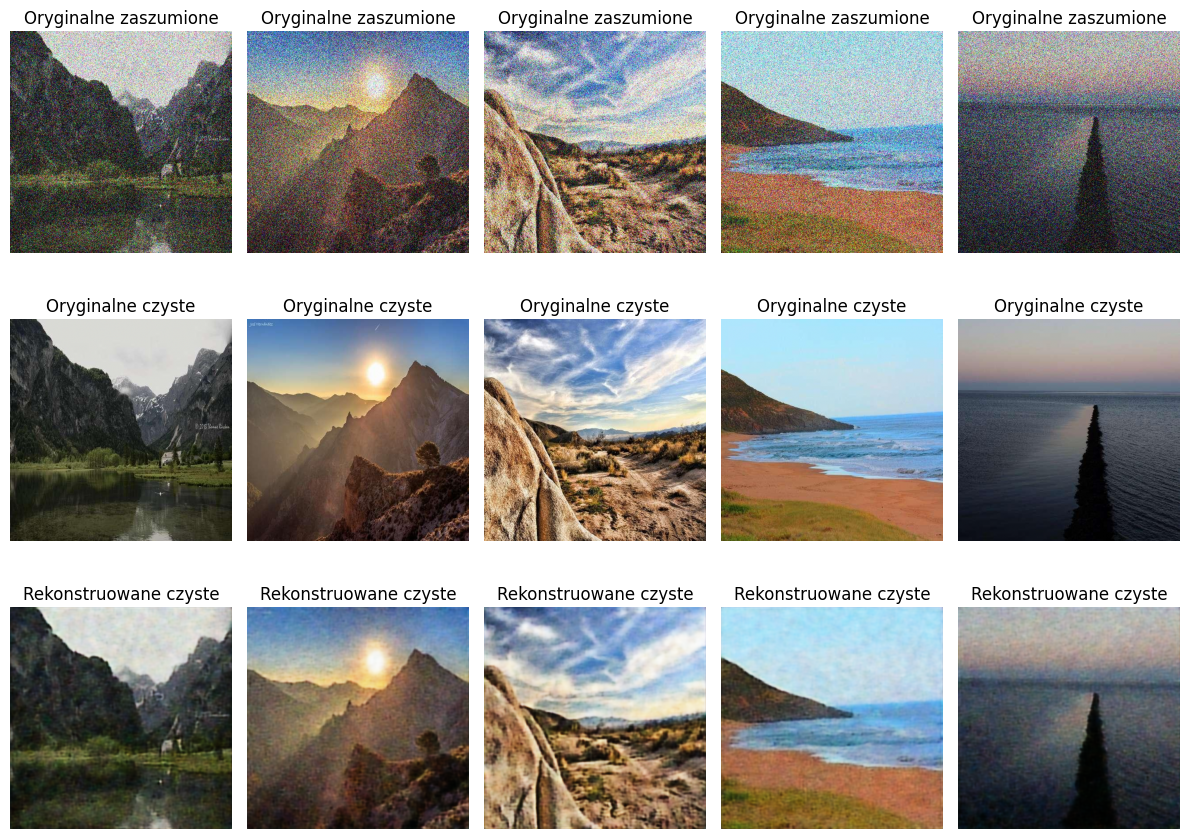

In [11]:
import random
import matplotlib.pyplot as plt

# Uzyskiwanie zrekonstruowanych obrazów
x_new_clean = denoising_autoencoder.predict(x_test_noisy)

# Wybieranie losowych 5 indeksów obrazów
random_indices = random.sample(range(len(x_test_noisy)), 5)

# Wyświetlanie oryginalnych obrazów, obrazów z szumem i zrekonstruowanych obrazów
fig, axes = plt.subplots(nrows=3, ncols=len(random_indices), figsize=(12, 9))
for i, index in enumerate(random_indices):
    original_noisy_image = x_test_noisy[index]
    original_clean_image = x_test_clean[index]
    reconstructed_image = x_new_clean[index]

    # zaszumione
    axes[0, i].imshow(original_noisy_image)
    axes[0, i].set_title("Oryginalne zaszumione")
    axes[0, i].axis("off")

    # oryginalne czyste
    axes[1, i].imshow(original_clean_image)
    axes[1, i].set_title("Oryginalne czyste")
    axes[1, i].axis("off")

    # rekonstruowane czyste
    axes[2, i].imshow(reconstructed_image)
    axes[2, i].set_title("Rekonstruowane czyste")
    axes[2, i].axis("off")

plt.tight_layout()
plt.show()

6/6 [==============================] - 38s 6s/step


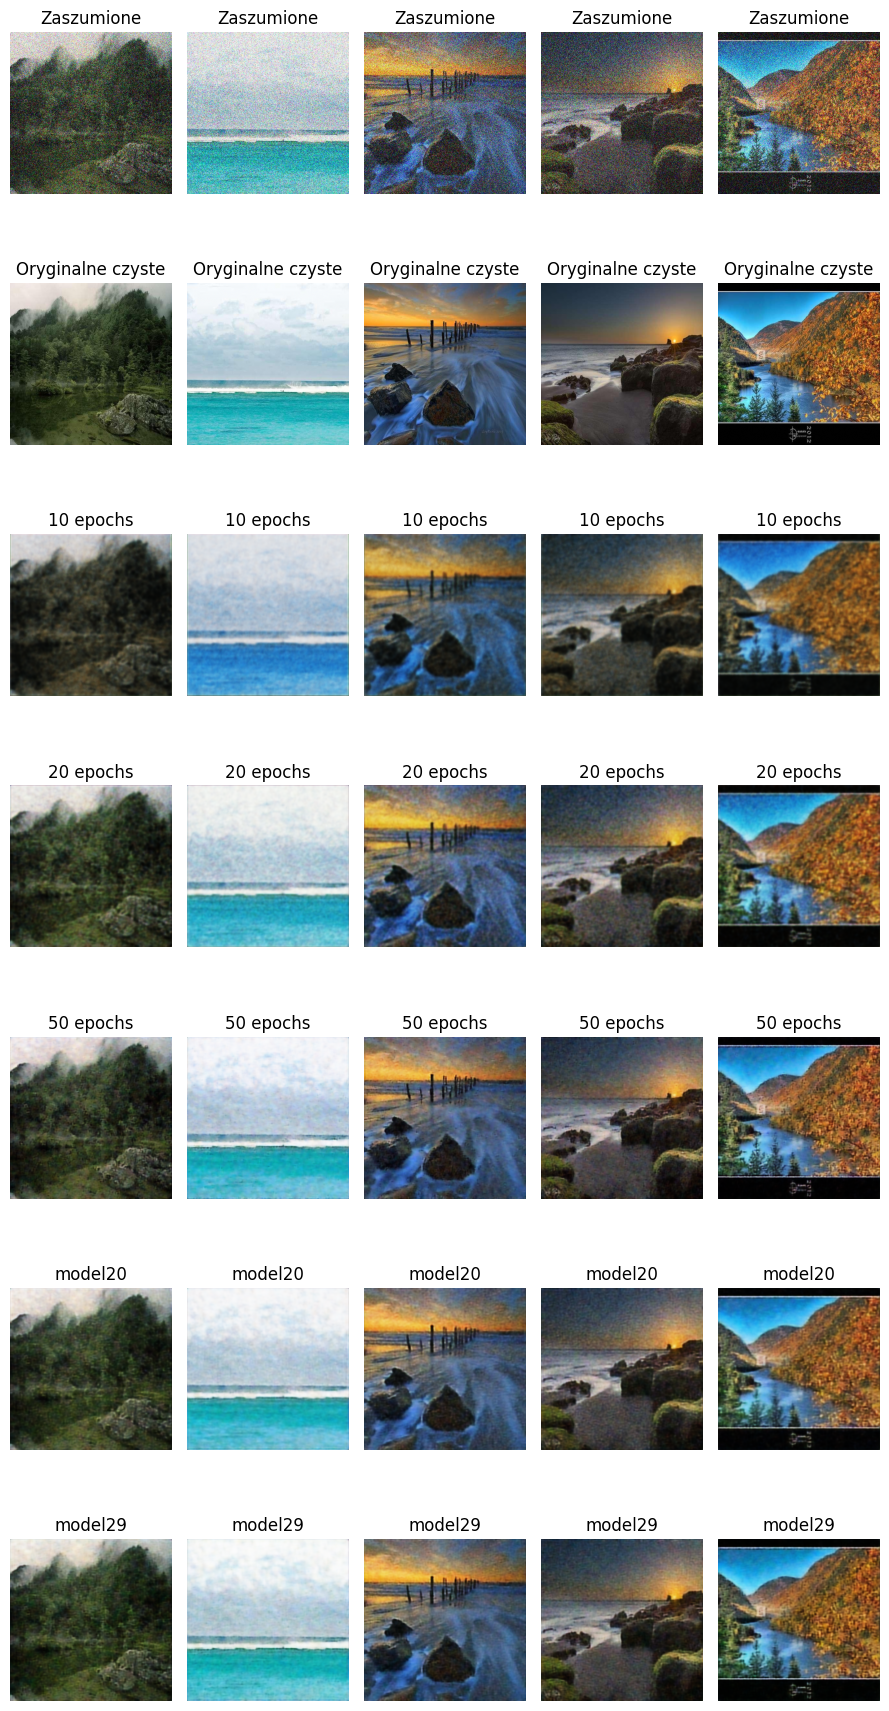

In [21]:
import random
import matplotlib.pyplot as plt

# Узyskiwanie zrekonstruowanych obrazów
x_new_clean10 = loaded_model10.predict(x_test_noisy)
x_new_clean20 = loaded_model20.predict(x_test_noisy)
x_new_clean50 = loaded_model50.predict(x_test_noisy)
x_new_cleanbetter = loaded_modelbetter.predict(x_test_noisy)
x_new_cleanbetter29 = loaded_modelbetter29.predict(x_test_noisy)

# Wybieranie losowych 5 indeksów obrazów
random_indices = random.sample(range(len(x_test_noisy)), 5)

# Wyświetlanie oryginalnych obrazów, obrazów z szumem i zrekonstruowanych obrazów

fig, axes = plt.subplots(nrows=7, ncols=len(random_indices), figsize=(9, 18))
for i, index in enumerate(random_indices):
    original_noisy_image = x_test_noisy[index]
    original_clean_image = x_test_clean[index]
    reconstructed_image10 = x_new_clean10[index]
    reconstructed_image20 = x_new_clean20[index]
    reconstructed_image50 = x_new_clean50[index]
    reconstructed_imagebetter = x_new_cleanbetter[index]
    reconstructed_imagebetter29 = x_new_cleanbetter29[index]
    # zaszumione
    axes[0, i].imshow(original_noisy_image)
    axes[0, i].set_title("Zaszumione")
    axes[0, i].axis("off")

    # oryginalne czyste
    axes[1, i].imshow(original_clean_image)
    axes[1, i].set_title("Oryginalne czyste")
    axes[1, i].axis("off")

    # rekonstruowane czyste
    axes[2, i].imshow(reconstructed_image10)
    axes[2, i].set_title("10 epochs")
    axes[2, i].axis("off")

    axes[3, i].imshow(reconstructed_image20)
    axes[3, i].set_title("20 epochs")
    axes[3, i].axis("off")

    axes[4, i].imshow(reconstructed_image50)
    axes[4, i].set_title("50 epochs")
    axes[4, i].axis("off")

    axes[5, i].imshow(reconstructed_imagebetter)
    axes[5, i].set_title("model20")
    axes[5, i].axis("off")

    axes[6, i].imshow(reconstructed_imagebetter29)
    axes[6, i].set_title("model29")
    axes[6, i].axis("off")

plt.tight_layout()
plt.show()